In [69]:
#Libraries Needed
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings

In [70]:
df=pd.read_csv("/content/drive/MyDrive/Assignments/MULTI LINEAR REGRESSION/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#EDA

In [71]:
df.rename(columns={"Age_08_04": "Age"}, inplace=True)
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [72]:
df_dummies = pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type')
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical feature
df.drop('Fuel_Type', axis=1, inplace=True)

print(df)

      Price  Age     KM   HP  Automatic    cc  Doors  Cylinders  Gears  \
0     13500   23  46986   90          0  2000      3          4      5   
1     13750   23  72937   90          0  2000      3          4      5   
2     13950   24  41711   90          0  2000      3          4      5   
3     14950   26  48000   90          0  2000      3          4      5   
4     13750   30  38500   90          0  2000      3          4      5   
...     ...  ...    ...  ...        ...   ...    ...        ...    ...   
1431   7500   69  20544   86          0  1300      3          4      5   
1432  10845   72  19000   86          0  1300      3          4      5   
1433   8500   71  17016   86          0  1300      3          4      5   
1434   7250   70  16916   86          0  1300      3          4      5   
1435   6950   76      1  110          0  1600      5          4      5   

      Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0       1165          False              True

In [73]:
#PLACING THE TARGET VARIABLE AT THE LAST
cols = [col for col in df.columns if col != 'Price'] + ['Price']
data = df[cols]

data.head()

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
0,23,46986,90,0,2000,3,4,5,1165,False,True,False,13500
1,23,72937,90,0,2000,3,4,5,1165,False,True,False,13750
2,24,41711,90,0,2000,3,4,5,1165,False,True,False,13950
3,26,48000,90,0,2000,3,4,5,1165,False,True,False,14950
4,30,38500,90,0,2000,3,4,5,1170,False,True,False,13750


In [74]:
data_new = data.loc[:, ~data.T.duplicated()]
data_new.head()

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
0,23,46986,90,0,2000,3,4,5,1165,False,True,False,13500
1,23,72937,90,0,2000,3,4,5,1165,False,True,False,13750
2,24,41711,90,0,2000,3,4,5,1165,False,True,False,13950
3,26,48000,90,0,2000,3,4,5,1165,False,True,False,14950
4,30,38500,90,0,2000,3,4,5,1170,False,True,False,13750


The dataset consists of the following variables:
* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic ( (Yes=1, No=0))
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Cylinders : Number of cylinders in the engine
* Gears: Number of Gears
* Weight: Weight in Kilograms
* Price: Offer Price in EUROs


In [75]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1436 non-null   int64
 1   KM                1436 non-null   int64
 2   HP                1436 non-null   int64
 3   Automatic         1436 non-null   int64
 4   cc                1436 non-null   int64
 5   Doors             1436 non-null   int64
 6   Cylinders         1436 non-null   int64
 7   Gears             1436 non-null   int64
 8   Weight            1436 non-null   int64
 9   Fuel_Type_CNG     1436 non-null   bool 
 10  Fuel_Type_Diesel  1436 non-null   bool 
 11  Fuel_Type_Petrol  1436 non-null   bool 
 12  Price             1436 non-null   int64
dtypes: bool(3), int64(10)
memory usage: 116.5 KB


### There are no null values present in the data, so we check for duplicate and remove them

In [76]:
data_new[data_new.duplicated(keep=False)]
#only one duplicate value in all these 1436 entries and no null values

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
112,8,13253,116,0,2000,5,4,5,1320,False,True,False,24950
113,8,13253,116,0,2000,5,4,5,1320,False,True,False,24950


In [77]:
data_cleaned=data_new.drop_duplicates()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1435 non-null   int64
 1   KM                1435 non-null   int64
 2   HP                1435 non-null   int64
 3   Automatic         1435 non-null   int64
 4   cc                1435 non-null   int64
 5   Doors             1435 non-null   int64
 6   Cylinders         1435 non-null   int64
 7   Gears             1435 non-null   int64
 8   Weight            1435 non-null   int64
 9   Fuel_Type_CNG     1435 non-null   bool 
 10  Fuel_Type_Diesel  1435 non-null   bool 
 11  Fuel_Type_Petrol  1435 non-null   bool 
 12  Price             1435 non-null   int64
dtypes: bool(3), int64(10)
memory usage: 127.5 KB


* Duplicates are also removed

* there are no null values and Duplicates are also removed
* on input feature is categorical data ,we can convert that categorical feature into dummy variable


In [78]:
#Let's store the data into another variable and make a checkpoint for data storage
data1=data_cleaned.copy()


In [79]:
data1.describe()

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.000000
mean,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108,10720.915679
std,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882,3608.732978
min,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000,4350.000000
25%,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000,8450.000000
50%,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000,9900.000000
75%,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000,11950.000000
max,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000,32500.000000


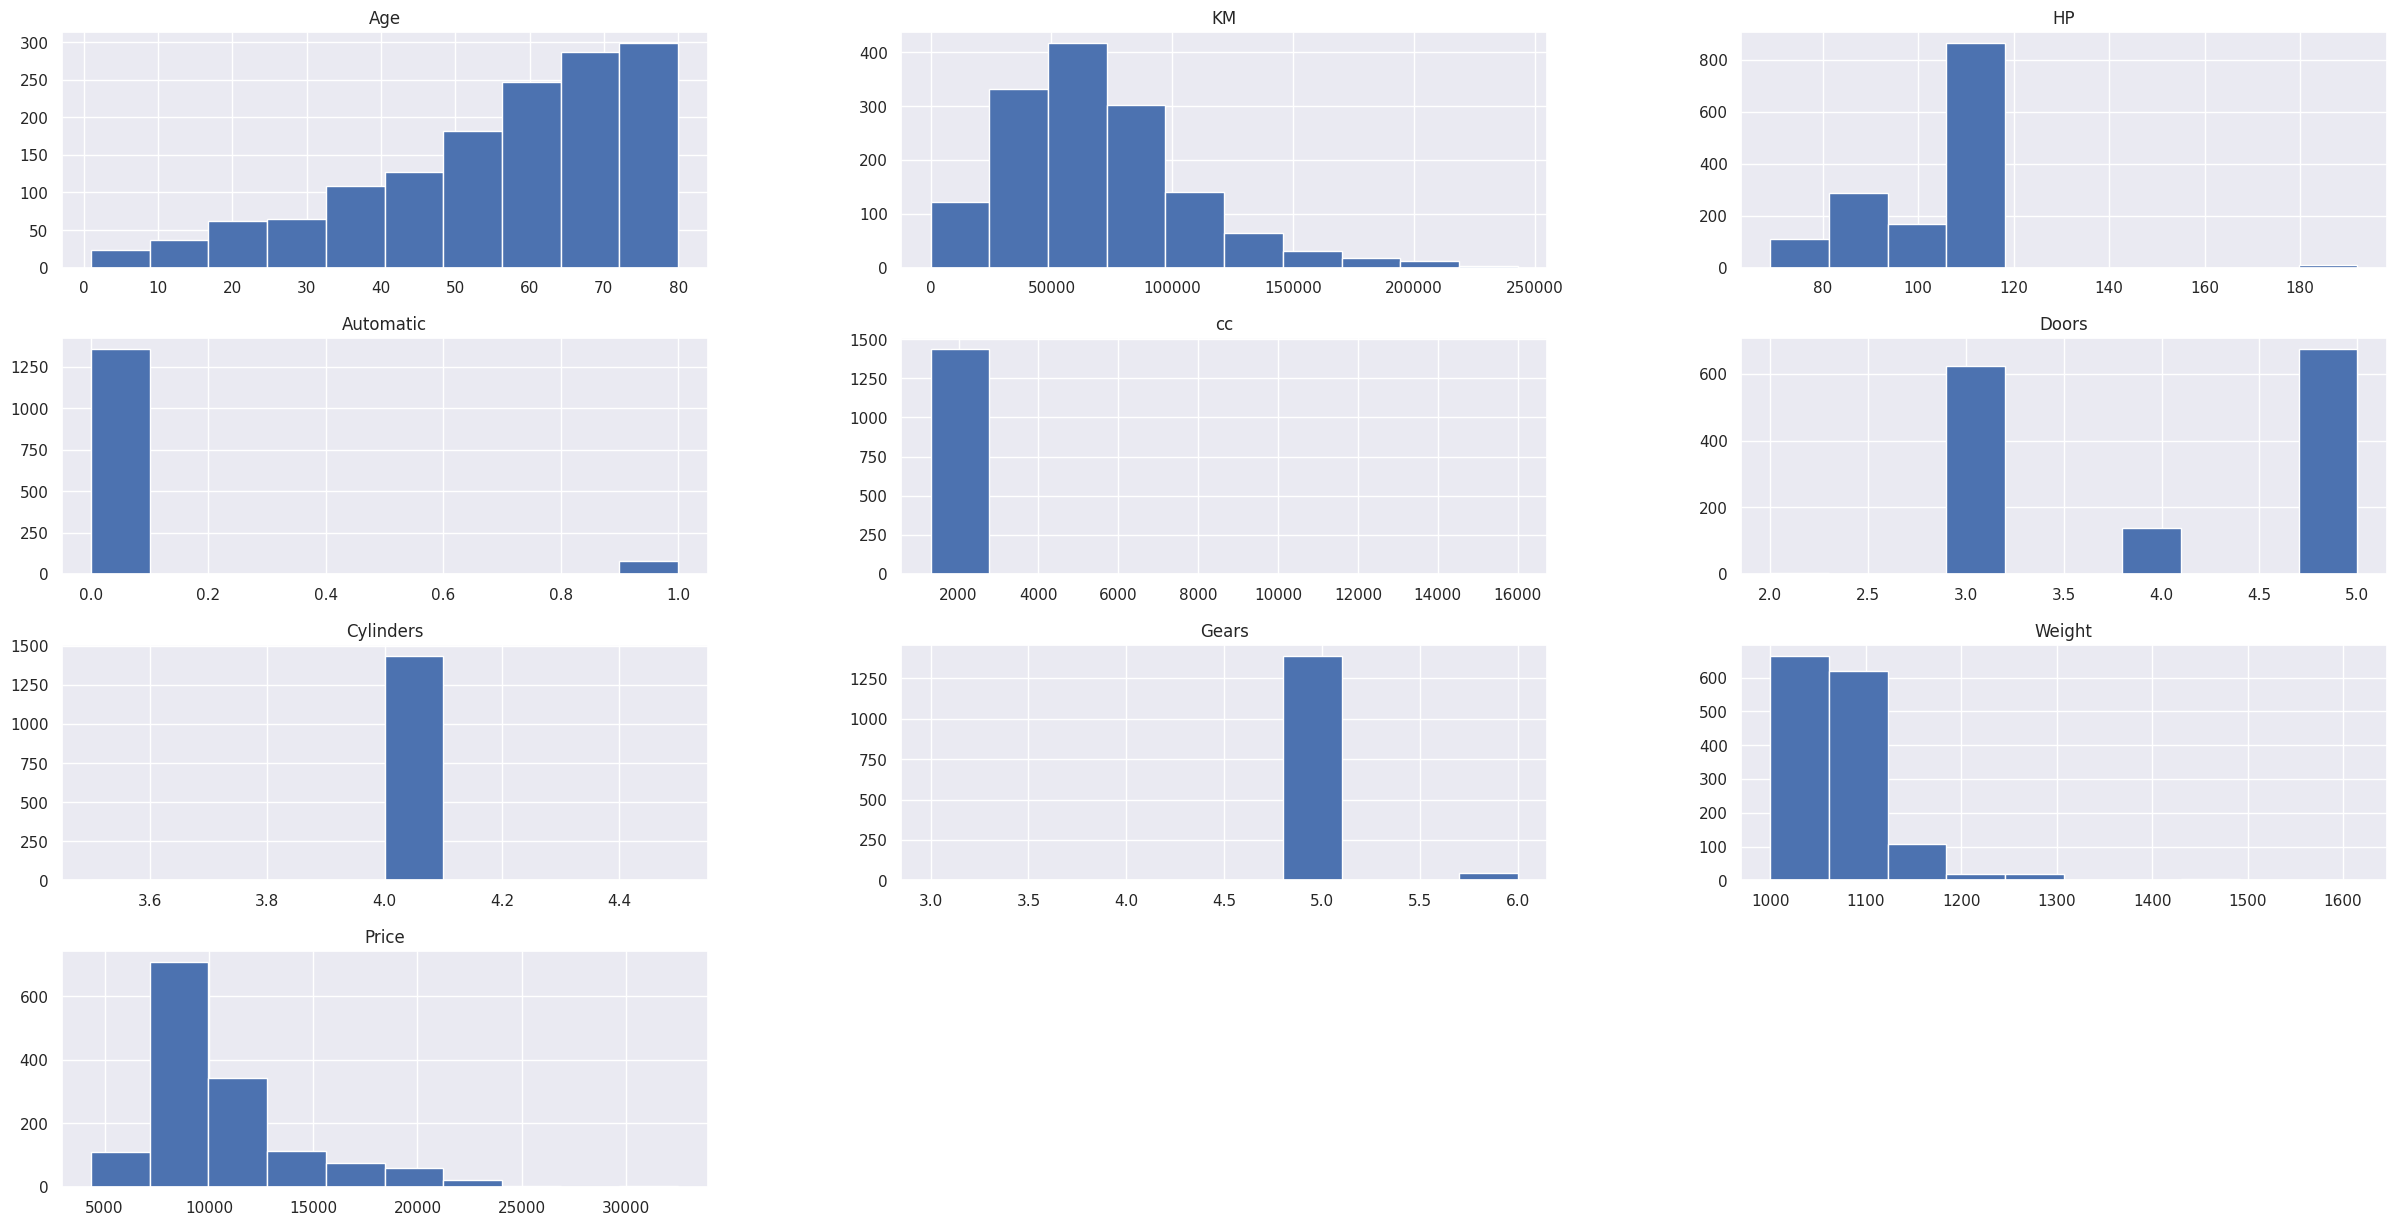

In [80]:
# DATA VISUALIZATION IN THE FORM OF HISTOGRAMS TO UNDERSTAND THE DISTRIBUTION OF DATA
data1.hist(figsize=(30,15))
plt.show()

*  the features such as automatic, cc, Doors, cylinders, gears are more numerical but there dsitribution is more like categorical data
* and the features as Age, KM(Kilometer), HP(Horse power),Weight and price  and their normal distributions are skewed

In [81]:
data1.head()

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
0,23,46986,90,0,2000,3,4,5,1165,False,True,False,13500
1,23,72937,90,0,2000,3,4,5,1165,False,True,False,13750
2,24,41711,90,0,2000,3,4,5,1165,False,True,False,13950
3,26,48000,90,0,2000,3,4,5,1165,False,True,False,14950
4,30,38500,90,0,2000,3,4,5,1170,False,True,False,13750


WHAT HAPPENED TILL NOW
* LOADED THE DATASET AND CHANGES THE NAME OF THE COLUMN Age_08_04 to Age to just to make it easy to call
* identified the categorical data and as it is the input feature, so dummies were created and the target variable which is price was moved to the end
* as there were no null values, we tend to find duplictaes and removed them
* found out the statistical summary of the numerical data and visualizaed histograms to understand the distribution of the data
* the dataset we are gonna use furthur is ***data1*** with target variable Price


KNOW LET'S JUST SEE SOME OTHER VISUALIZATIONS SUCH AS BOX PLOTS TO SEE IF ANY OUTLIERS PRESENT

<Axes: >

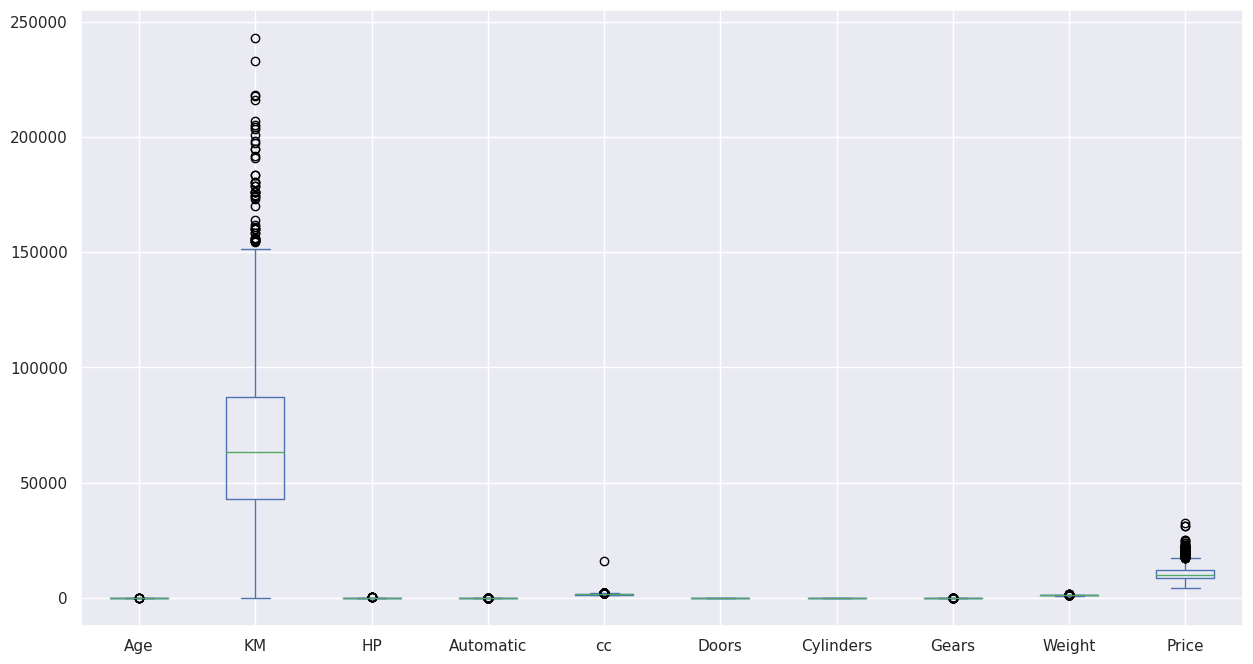

In [82]:
data1.plot(kind='box',figsize=(15,8))

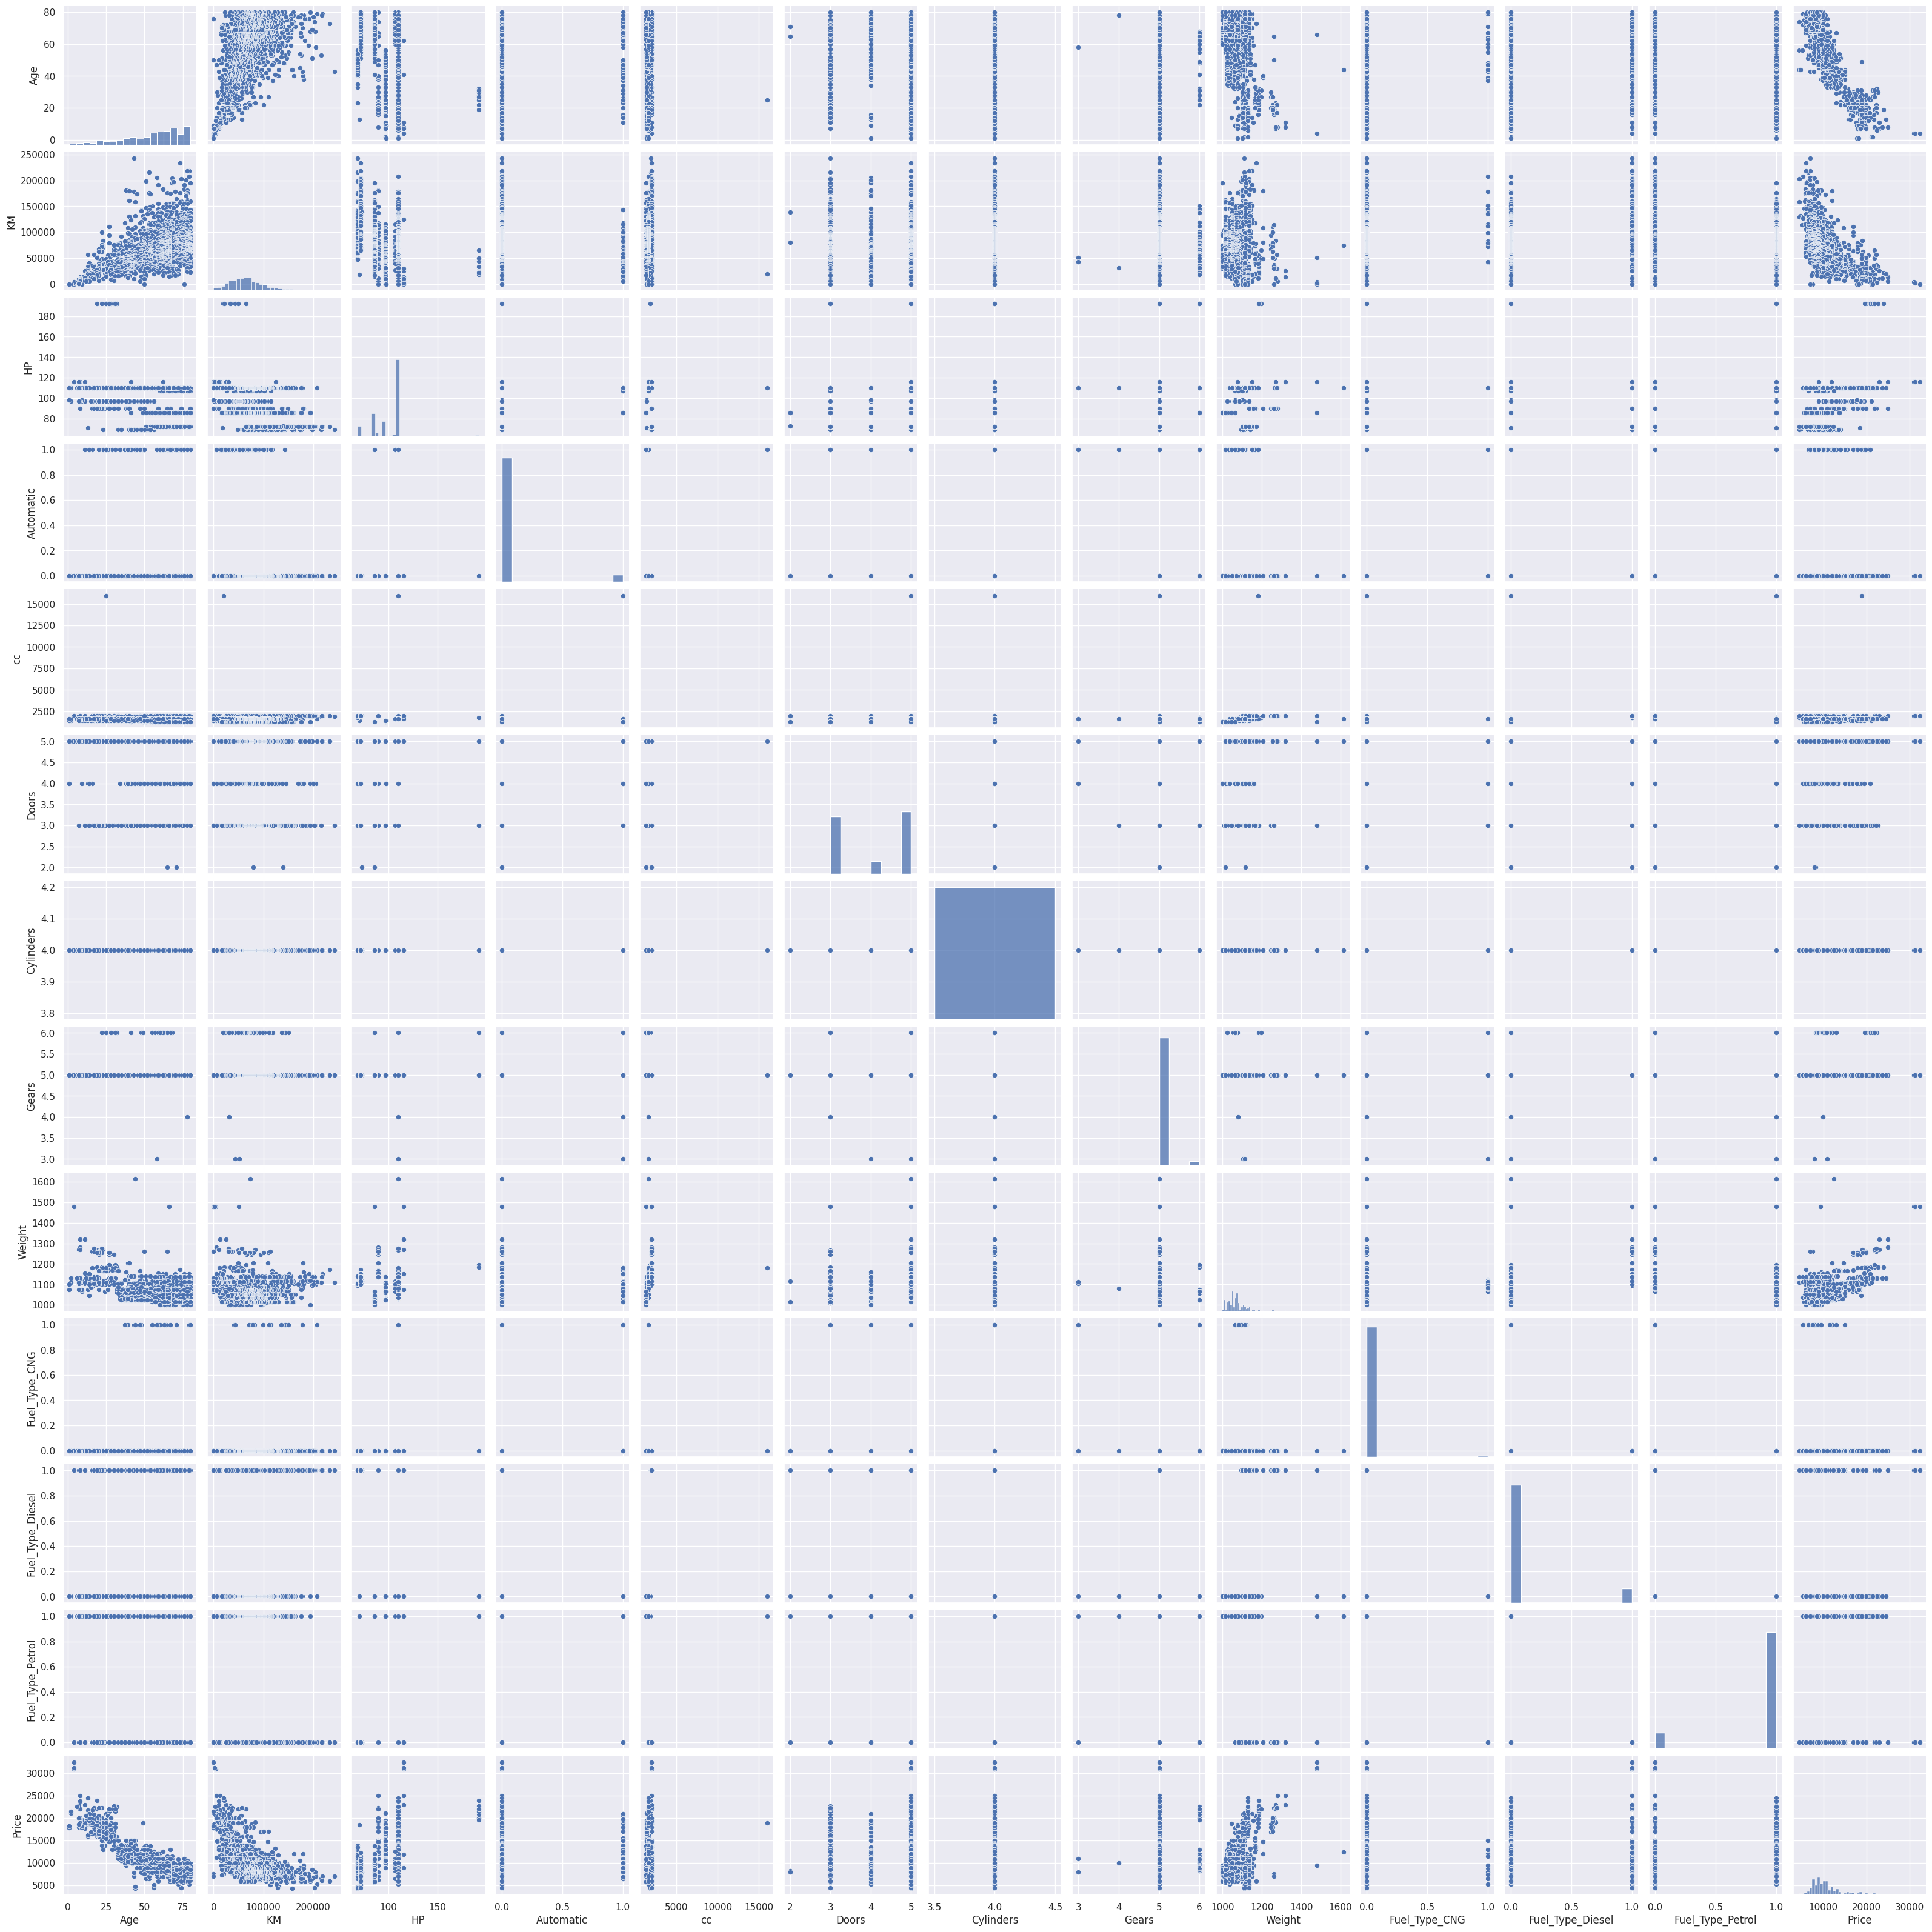

In [83]:
sb.pairplot(data1)
plt.show()

In [84]:
data1.corr()

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
Age,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484,0.002198,-0.093058,0.088169,-0.876273
KM,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969,0.144013,0.407497,-0.437397,-0.569420
HP,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143,0.062203,-0.537116,0.492362,0.314134
Automatic,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499,0.001467,-0.084248,0.079997,0.033928
cc,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077,0.006019,0.326780,-0.314200,0.124375
Doors,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734,0.009761,0.023538,-0.025746,0.183604
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238,-0.049548,-0.048706,0.063079,0.063831
Weight,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000,0.053530,0.564649,-0.557315,0.575869
Fuel_Type_CNG,0.002198,0.144013,0.062203,0.001467,0.006019,0.009761,NaN,-0.049548,0.053530,1.000000,-0.037964,-0.297688,-0.039449


saving data in the name of cars from now on

Cylinders have no correlation, and doors doesnt effect the price of the car so dropping those to columns

In [85]:
cars=data1.drop(columns=["Cylinders","Doors"],axis=1)
cars.corr()

#dropping the columns doors and cylinders as per domain research they have least significance while buying a second hand car

,Age,KM,HP,Automatic,cc,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
Age,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.005629,-0.466484,0.002198,-0.093058,0.088169,-0.876273
KM,0.504575,1.000000,-0.332904,-0.082168,0.103822,0.014890,-0.023969,0.144013,0.407497,-0.437397,-0.569420
HP,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.209642,0.087143,0.062203,-0.537116,0.492362,0.314134
Automatic,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.098582,0.058499,0.001467,-0.084248,0.079997,0.033928
cc,-0.096549,0.103822,0.035207,0.066934,1.000000,0.014732,0.335077,0.006019,0.326780,-0.314200,0.124375
Gears,-0.005629,0.014890,0.209642,-0.098582,0.014732,1.000000,0.021238,-0.049548,-0.048706,0.063079,0.063831
Weight,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.021238,1.000000,0.053530,0.564649,-0.557315,0.575869
Fuel_Type_CNG,0.002198,0.144013,0.062203,0.001467,0.006019,-0.049548,0.053530,1.000000,-0.037964,-0.297688,-0.039449
Fuel_Type_Diesel,-0.093058,0.407497,-0.537116,-0.084248,0.326780,-0.048706,0.564649,-0.037964,1.000000,-0.942673,0.046612
Fuel_Type_Petrol,0.088169,-0.437397,0.492362,0.079997,-0.314200,0.063079,-0.557315,-0.297688,-0.942673,1.000000,-0.031356


In [86]:
#renaming the feature names
cars=cars.rename({'Fuel_Type_Diesel': 'Diesel','Fuel_Type_CNG':'CNG','Fuel_Type_Petrol':'Petrol'},axis=1)
cars.head()

,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
0,23,46986,90,0,2000,5,1165,False,True,False,13500
1,23,72937,90,0,2000,5,1165,False,True,False,13750
2,24,41711,90,0,2000,5,1165,False,True,False,13950
3,26,48000,90,0,2000,5,1165,False,True,False,14950
4,30,38500,90,0,2000,5,1170,False,True,False,13750


<Axes: >

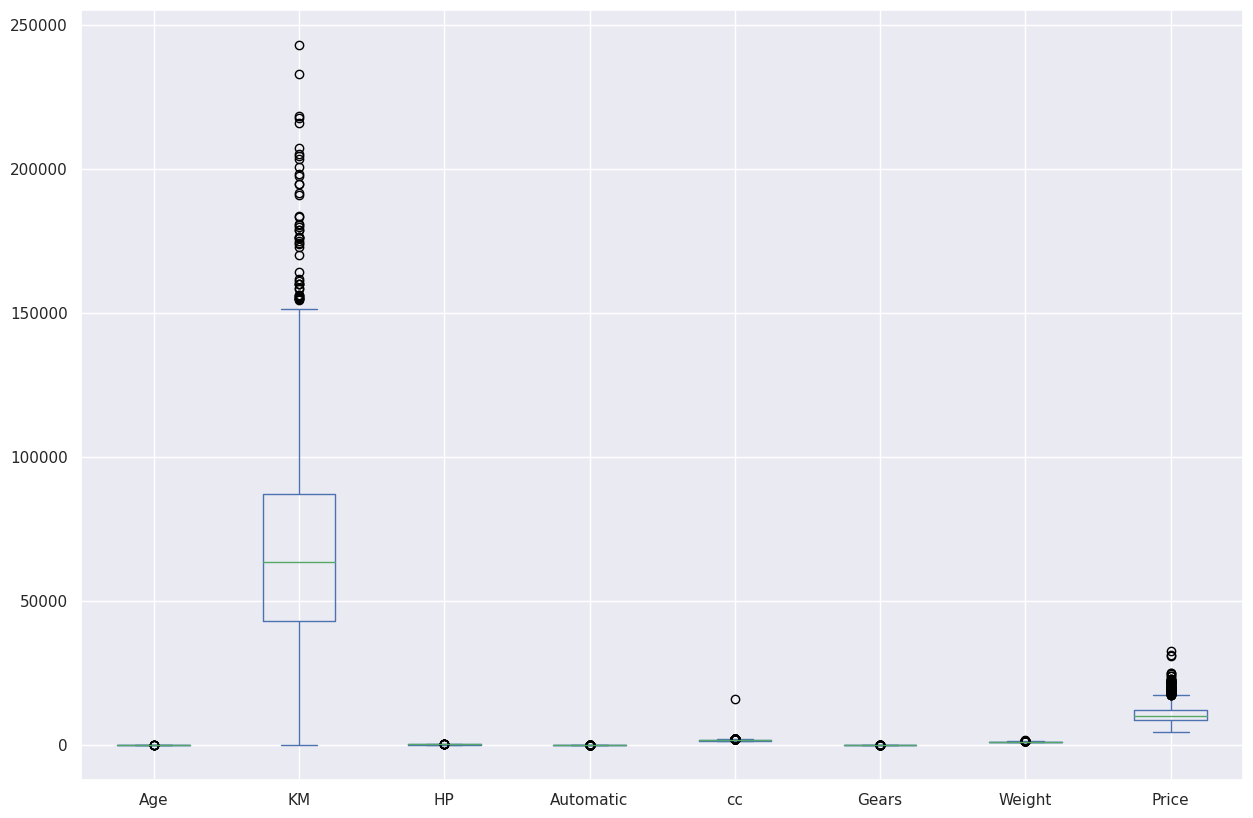

In [87]:
cars.plot(kind='box',figsize=(15,10))

yes there are some outliers but we will deal with this in the assumptions fro no influential observations

##SPLITTING THE DATA INTO 80(train)-20(test)

THIS IS BEFORE CONSIDERING ANY ASSUMPTIONS

In [88]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(cars,test_size = 0.2,random_state=0)

In [89]:
train=train.reset_index()
train.columns

Index(['index', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Gears', 'Weight', 'CNG',
       'Diesel', 'Petrol', 'Price'],
      dtype='object')

In [90]:
train.head()

,index,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
0,1323,80,66843,110,0,1600,5,1075,False,False,True,9450
1,610,68,155720,86,0,1300,5,1015,False,False,True,6950
2,512,51,53268,110,0,1600,5,1080,False,False,True,13950
3,878,60,61977,86,0,1300,5,1015,False,False,True,8500
4,1275,80,74151,110,0,1600,5,1050,False,False,True,7250


In [91]:
train=train.drop("index",axis=1)
train.head()
#droped the index column as it will have no significance when model will built

,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
0,80,66843,110,0,1600,5,1075,False,False,True,9450
1,68,155720,86,0,1300,5,1015,False,False,True,6950
2,51,53268,110,0,1600,5,1080,False,False,True,13950
3,60,61977,86,0,1300,5,1015,False,False,True,8500
4,80,74151,110,0,1600,5,1050,False,False,True,7250


In [92]:
test.head()

,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
652,63,115000,110,0,1600,5,1109,True,False,False,9450
412,48,98100,69,0,1900,5,1140,False,True,False,8950
343,41,29056,97,0,1400,5,1060,False,False,True,11950
1298,78,71186,110,0,1600,5,1050,False,False,True,7500
484,54,62519,97,0,1400,5,1025,False,False,True,9500


In [93]:
test=test.reset_index()
test.columns

Index(['index', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Gears', 'Weight', 'CNG',
       'Diesel', 'Petrol', 'Price'],
      dtype='object')

In [94]:
test=test.drop("index",axis=1)
test.head()
#droped the index column as it will have no significance when model will built

,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
0,63,115000,110,0,1600,5,1109,True,False,False,9450
1,48,98100,69,0,1900,5,1140,False,True,False,8950
2,41,29056,97,0,1400,5,1060,False,False,True,11950
3,78,71186,110,0,1600,5,1050,False,False,True,7500
4,54,62519,97,0,1400,5,1025,False,False,True,9500


 ## Just to make sure that the columns are same in both train and test

## Let's build the model with all the input features in it and thats the base model

In [95]:
cars["CNG"]=cars["CNG"].astype(int)
cars["Diesel"]=cars["Diesel"].astype(int)
cars["Petrol"]=cars["Petrol"].astype(int)

In [96]:
cars.head()

,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
0,23,46986,90,0,2000,5,1165,0,1,0,13500
1,23,72937,90,0,2000,5,1165,0,1,0,13750
2,24,41711,90,0,2000,5,1165,0,1,0,13950
3,26,48000,90,0,2000,5,1165,0,1,0,14950
4,30,38500,90,0,2000,5,1170,0,1,0,13750


##  True is 1, False is 0

In [97]:
import statsmodels.formula.api as smf
basemodel = smf.ols('Price~Age+KM+HP+Automatic+cc+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit()

In [98]:
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:51:43   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1425   BIC:                         2.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6845.8501   1141.197     -5.999      0.000   -9084.456   -4607.244
Age         -123.8519      2.629    -47.114      0.000    -129.009    -118.695
KM            -0.0175      0.001    -13.185      0.000      -0.020      -0.015
HP            23.5080      3.563      6.597      0.000      16.518      30.498
Automatic    316.3705    159.873      1.979      0.048       2.760     629.981
cc            -0.0543      0.092     -0.590      0.555      -0.235       0.126
Gears        655.2024    194.071      3.376      0.001     274.507    1035.898
Weight        20.4037      1.146     17.806      0.000      18.156      22.651
CNG        -2845.7948    432.887     -6.574      0.000   -3694.958   -1996.631
Diesel     -2284.5698    474.084     -4.819      0.000   -3214.548   -1354.592
Petrol     -1715.4855    354.837     -4.835      0.000   -2411.544   -1019.427
==============================================================================
Omnibus:                      249.460   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2523.495
Skew:                          -0.485   Prob(JB):                         0.00
Kurtosis:                       9.424   Cond. No.                     3.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.86e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* so here what we built is the base model consisting all present input features in the given dataset
* as we know that the p value should be less than 0.05 and any feature having the p value above it even with only a slight difference also needed to be considered whether it has any significance or not
* that is why for multi linear regression there are some assumptions that are need to be followed to build the final model

# ASSUMPTIONS FOR MULTI LINEAR REGRESSION
* LINEARITY: the assumption is that there should be depending variables or we can say it as multicollinearity
* predictors or feature selection: picking up the right feature to build the model
* observations: the observations should be independent to each other and should be equally reliable
* errors: this assumption has 4 sub levels
    
    - Normally distributed or independently and identically distributed
    - zero mean error
    - Homoscadasticity(constant variance thorugh out the scatter plot)
    - independent to eac other

In [99]:
basemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:51:43   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1425   BIC:                         2.479e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6845.8501   1141.197     -5.999      0.000   -9084.456   -4607.244
Age         -123.8519      2.629    -47.114      0.000    -129.009    -118.695
KM            -0.0175      0.001    -13.185      0.000      -0.020      -0.015
HP            23.5080      3.563      6.597      0.000      16.518      30.498
Automatic    316.3705    159.873      1.979      0.048       2.760     629.981
cc            -0.0543      0.092     -0.590      0.555      -0.235       0.126
Gears        655.2024    194.071      3.376      0.001     274.507    1035.898
Weight        20.4037      1.146     17.806      0.000      18.156      22.651
CNG        -2845.7948    432.887     -6.574      0.000   -3694.958   -1996.631
Diesel     -2284.5698    474.084     -4.819      0.000   -3214.548   -1354.592
Petrol     -1715.4855    354.837     -4.835      0.000   -2411.544   -1019.427
==============================================================================
Omnibus:                      249.460   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2523.495
Skew:                          -0.485   Prob(JB):                         0.00
Kurtosis:                       9.424   Cond. No.                     3.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.86e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- THE P value for the feature diesel and automatic are high than 0.05
- the p value for the features CNG, age, KM,HP,cc,Weight are 0.000 and petrol is 0.001
- but according to the domain knowledge, age , KM,  matters when you buy a second hand car more than HP and cc

### LINEARITY CHECK

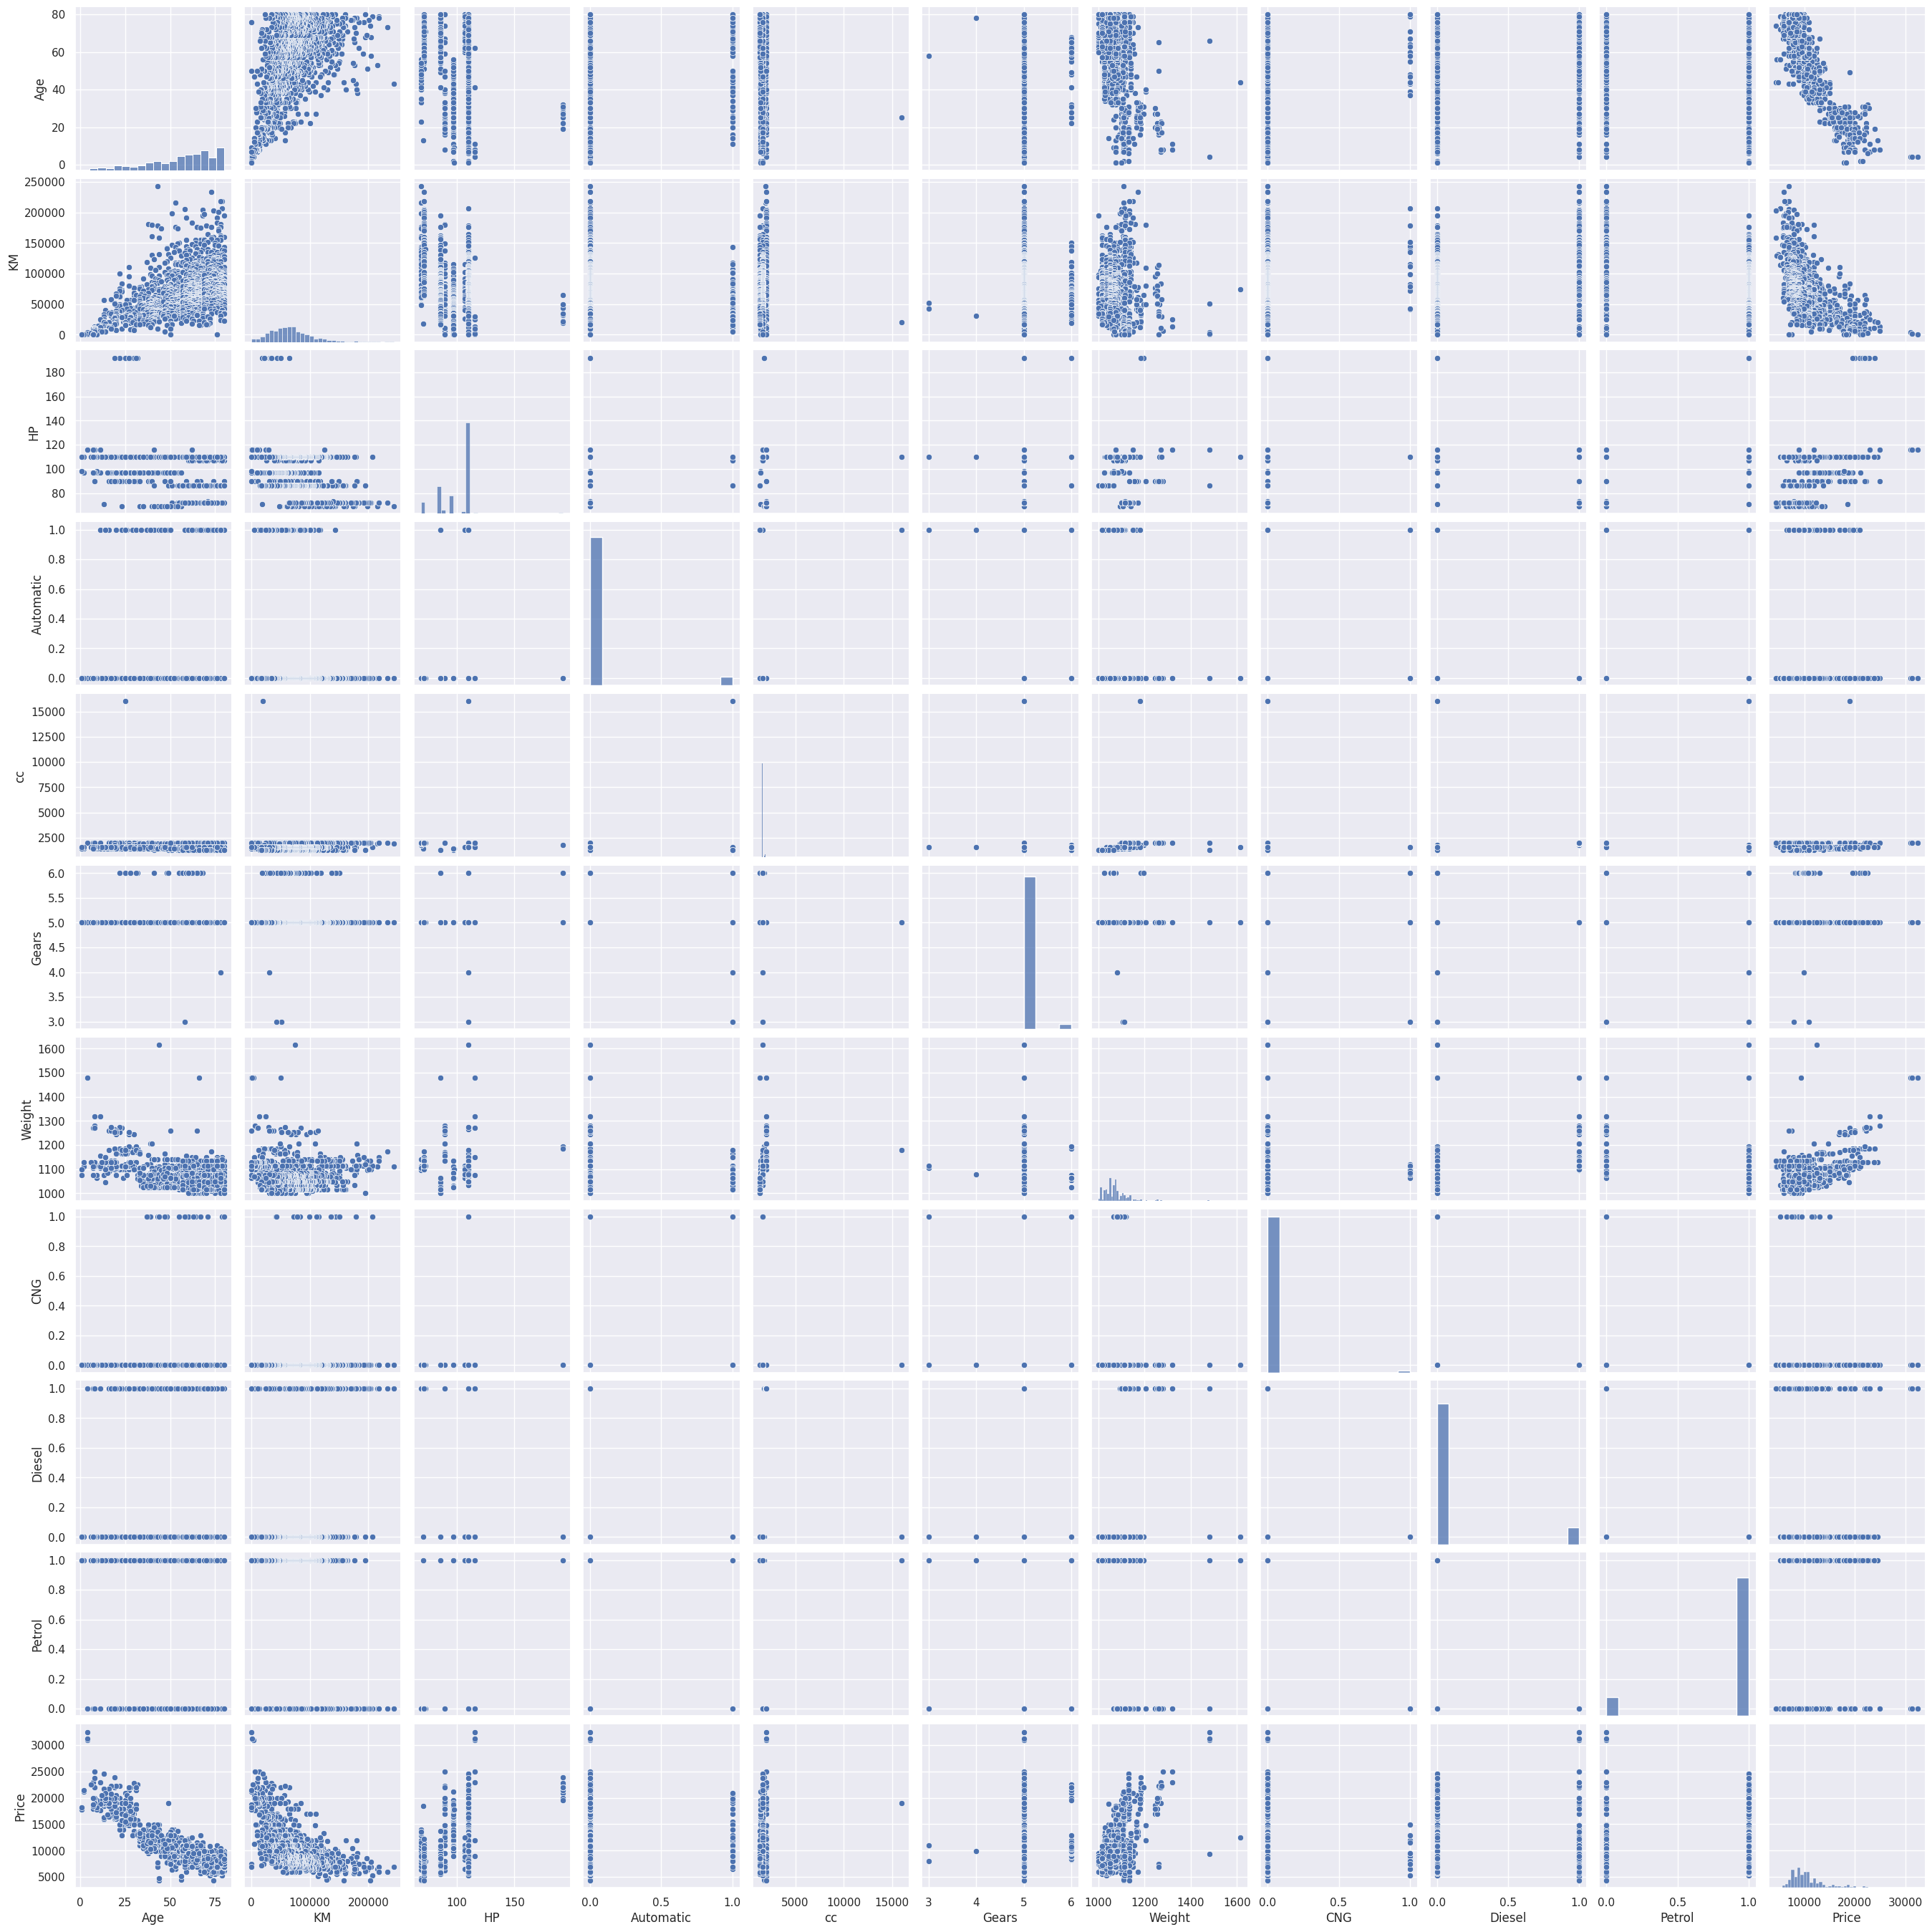

In [100]:
sb.pairplot(cars)
plt.show()

there is no prblem of collinearity in here even if there is any that is so less that there is no significance for it in te model

 so know as we built the model with all the all the input features there and identified the in significant fe

### LETS DO FEATURE SELECTION
  * THERE ARE TWO WAYS OF DOING IT
        - FORWARD SELECTION
        - BACKWARD SELECTION

In [101]:
#lets build a model without the feature cc
basemodel_1 = smf.ols('Price~Age+KM+HP+Automatic+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit()

In [102]:
basemodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1129.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:52:27   Log-Likelihood:                -12360.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6868.2056   1140.307     -6.023      0.000   -9105.065   -4631.346
Age         -123.8466      2.628    -47.123      0.000    -129.002    -118.691
KM            -0.0175      0.001    -13.206      0.000      -0.020      -0.015
HP            23.0829      3.489      6.616      0.000      16.239      29.927
Automatic    306.5371    158.965      1.928      0.054      -5.294     618.368
Gears        656.9180    194.005      3.386      0.001     276.353    1037.483
Weight        20.3786      1.145     17.801      0.000      18.133      22.624
CNG        -2842.0038    432.740     -6.567      0.000   -3690.879   -1993.128
Diesel     -2313.9388    471.357     -4.909      0.000   -3238.567   -1389.311
Petrol     -1712.2630    354.714     -4.827      0.000   -2408.080   -1016.446
==============================================================================
Omnibus:                      247.990   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2508.122
Skew:                          -0.479   Prob(JB):                         0.00
Kurtosis:                       9.405   Cond. No.                     3.88e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

AFTER THE REMOVAL OF CC, AUTOMATIC BEGIN TO SHOW INSIGNIFICANCE FOR THE MODEL BUILDING, SO LETS REMOVE IT KEEPING CC IN

In [103]:
basemodel_2 = smf.ols('Price~Age+KM+HP+cc+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit()

In [104]:
basemodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1126.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:52:27   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1426   BIC:                         2.479e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7060.9592   1137.169     -6.209      0.000   -9291.663   -4830.256
Age         -123.1738      2.609    -47.211      0.000    -128.292    -118.056
KM            -0.0177      0.001    -13.332      0.000      -0.020      -0.015
HP            22.5480      3.534      6.381      0.000      15.616      29.480
cc            -0.0353      0.092     -0.386      0.700      -0.215       0.144
Gears        623.8918    193.622      3.222      0.001     244.076    1003.707
Weight        20.8533      1.124     18.548      0.000      18.648      23.059
CNG        -2893.4747    432.657     -6.688      0.000   -3742.188   -2044.761
Diesel     -2410.6416    470.264     -5.126      0.000   -3333.126   -1488.158
Petrol     -1756.8429    354.583     -4.955      0.000   -2452.403   -1061.283
==============================================================================
Omnibus:                      266.330   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2805.104
Skew:                          -0.534   Prob(JB):                         0.00
Kurtosis:                       9.766   Cond. No.                     3.88e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

EVEN AFTER REMOVING AUTOMATIC AND LEAVING CC BEHIND INCRESED CC's INSIGNIFICANCE TOWARDS MODEL BUILDING

SO LET'S REMOVE BOTH AND CHECK

In [105]:
#model without both automatic and cc
basemodel_3 = smf.ols('Price~Age+KM+HP+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit()
basemodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1288.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:52:27   Log-Likelihood:                -12362.
No. Observations:                1435   AIC:                         2.474e+04
Df Residuals:                    1427   BIC:                         2.478e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7071.2640   1136.516     -6.222      0.000   -9300.685   -4841.843
Age         -123.1841      2.608    -47.232      0.000    -128.300    -118.068
KM            -0.0177      0.001    -13.344      0.000      -0.020      -0.015
HP            22.2881      3.468      6.427      0.000      15.486      29.091
Gears        625.6600    193.510      3.233      0.001     246.065    1005.255
Weight        20.8277      1.122     18.564      0.000      18.627      23.029
CNG        -2890.0070    432.435     -6.683      0.000   -3738.283   -2041.731
Diesel     -2427.3787    468.117     -5.185      0.000   -3345.650   -1509.108
Petrol     -1753.8783    354.394     -4.949      0.000   -2449.067   -1058.690
==============================================================================
Omnibus:                      264.953   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2787.171
Skew:                          -0.529   Prob(JB):                         0.00
Kurtosis:                       9.745   Cond. No.                     3.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.85e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* the r squared and adj r squared values were similar through out the building of base model
* but with the change in feature selection, made the f statistic score to increase
* the last model has given the best f score overall the 3 base models that were built and aslo the last model has no insignificant features in it
* basemodel_3 is the **" # FIRST MODEL "** that can be used to predict the price of the cars using the features that were only used to build the model

##CALCULATING THE VARIANCE INFLATION FACTOR(VIF)

In [106]:
rsq_age=smf.ols('Age~KM+HP+Automatic+cc+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+Automatic+cc+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~KM+Age+Automatic+cc+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_auto=smf.ols('Automatic~Age+KM+HP+cc+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_auto=1/(1-rsq_auto)

rsq_cc=smf.ols('cc~Age+KM+HP+Automatic+Gears+Weight+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_gears=smf.ols('Gears~Age+KM+HP+Automatic+cc+Weight+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_wt=smf.ols('Weight~Age+KM+HP+Automatic+cc+Gears+CNG+Diesel+Petrol',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_cng=smf.ols('CNG~Age+KM+HP+Automatic+cc+Gears+Weight+Diesel+Petrol',data=cars).fit().rsquared
vif_cng=1/(1-rsq_cng)

rsq_d=smf.ols('Diesel~Age+KM+HP+Automatic+cc+Gears+Weight+CNG+Petrol',data=cars).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_p=smf.ols('Petrol~Age+KM+HP+Automatic+cc+Gears+Weight+CNG+Diesel',data=cars).fit().rsquared
vif_p=1/(1-rsq_p)

In [107]:
D1={"variables":["Age","KM","HP","Automatic","cc","Gears","Weight","CNG","Diesel","Petrol"],"VIF":[vif_age,vif_km,vif_hp,vif_auto,vif_cc,vif_gears,vif_wt,vif_cng,vif_d,vif_p]}
Vif_frame= pd.DataFrame(D1)
Vif_frame

,variables,VIF
0,Age,1.911884
1,KM,1.987865
2,HP,2.288083
3,Automatic,1.081009
4,cc,1.222256
5,Gears,1.075329
6,Weight,2.878233
7,CNG,inf
8,Diesel,inf
9,Petrol,inf


Interpreting VIF Values
* VIF = 1: No multicollinearity.
* 1 < VIF < 5: Moderate multicollinearity.
* VIF >= 5: High multicollinearity, potentially problematic.
* VIF > 10: Very high multicollinearity, typically considered problematic and often used as a rule of thumb threshold.

- Here every feature is fine and no feature has high multi collinearity that effects the model and ignore cng.deisel and petrol as they are boolena values converted into numbers so not an issue

* SO BASEMODEL_3 IS THE FINAL MODEL WITH SELECTED FEATURES IN IT
*  AND THE SELECTED FEATURES ARE Price , Age , KM , HP , Gears , Weight , CNG , Diesel , Petrol


#ASSUMPTIONS FOR NO INFLUENTIAL OBSERVATIONS

In [108]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = basemodel_3.get_influence()
(c, _)= model_influence.cooks_distance

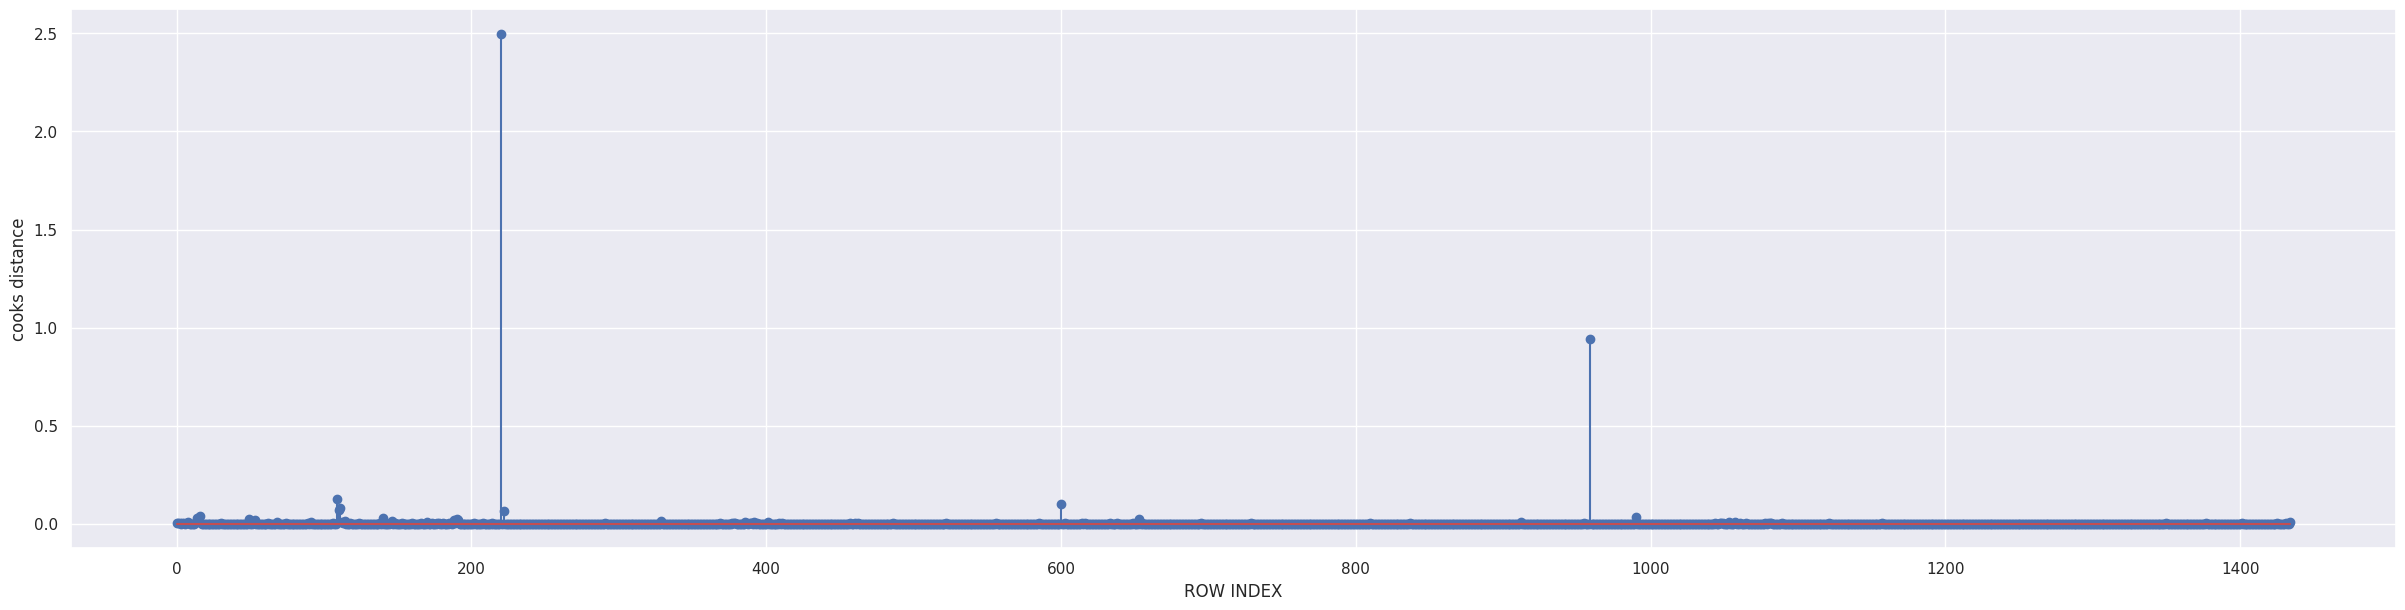

In [109]:
#plot the influnce on stem plot
fig=plt.subplots(figsize=(30,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel("ROW INDEX")
plt.ylabel("cooks distance")
plt.show()

In [110]:
print(np.argmax(c))
print(np.max(c))

220
2.4975656653762126


In [111]:
print(len(cars))

1435


#INFLUENCE PLOT

In [112]:
k=8 # k values represent the number of features selected for the mode
n=1435 # total number of observations
lev_cutoff=3*(1+k)/n
lev_cutoff


0.018815331010452963

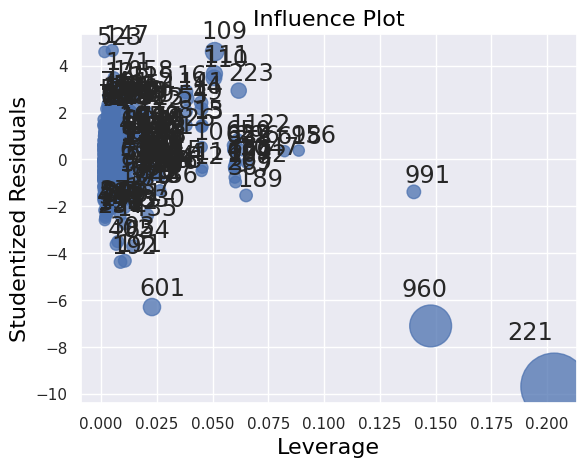

In [113]:
influence_plot(basemodel_3)
y=[i for i in range(-2,8)]

In [114]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars1=cars.drop(cars.index[[221,960,991]],axis=0).reset_index()

In [115]:
#Drop the original index
cars1=cars1.drop(['index'],axis=1)

In [116]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1432 non-null   int64
 1   KM         1432 non-null   int64
 2   HP         1432 non-null   int64
 3   Automatic  1432 non-null   int64
 4   cc         1432 non-null   int64
 5   Gears      1432 non-null   int64
 6   Weight     1432 non-null   int64
 7   CNG        1432 non-null   int64
 8   Diesel     1432 non-null   int64
 9   Petrol     1432 non-null   int64
 10  Price      1432 non-null   int64
dtypes: int64(11)
memory usage: 123.2 KB


* three influential entries were removed

In [117]:
# let's build an intermediate model with the dataset without influential observationa and the selected features
# we are building this intermediate model to check with residual errors and variance of the data
# lets name this model as inter_model
intermodel = smf.ols('Price~Age+KM+HP+Gears+Weight+CNG+Diesel+Petrol',data=cars1).fit()
intermodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1288.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        10:52:35   Log-Likelihood:                -12336.
No. Observations:                1432   AIC:                         2.469e+04
Df Residuals:                    1424   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7055.9962   1136.739     -6.207      0.000   -9285.858   -4826.134
Age         -123.1859      2.610    -47.189      0.000    -128.307    -118.065
KM            -0.0177      0.001    -13.337      0.000      -0.020      -0.015
HP            22.4008      3.469      6.457      0.000      15.595      29.207
Gears        622.1958    193.520      3.215      0.001     242.582    1001.810
Weight        20.8166      1.122     18.549      0.000      18.615      23.018
CNG        -2887.2783    432.469     -6.676      0.000   -3735.622   -2038.934
Diesel     -2420.2742    468.246     -5.169      0.000   -3338.800   -1501.749
Petrol     -1748.4437    354.451     -4.933      0.000   -2443.747   -1053.141
==============================================================================
Omnibus:                      265.033   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2788.708
Skew:                          -0.531   Prob(JB):                         0.00
Kurtosis:                       9.753   Cond. No.                     5.48e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# ASSUMPTION OF ERRORS

In [118]:
#mean of the errors should be 0
#always check with resid , but not pearson

intermodel.resid.mean()

2.588396516365816e-09

In [119]:
#these are standardized residuals/errors and their mean will always be 0
intermodel.resid_pearson.mean()

1.9354598619012814e-12

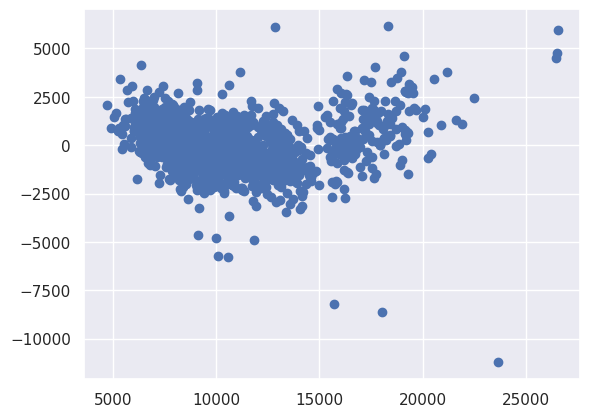

In [120]:
plt.scatter(intermodel.fittedvalues,intermodel.resid)

* There is a kind of heteroscadasticity from a point, it is more like some intensity of variance till one point and some intensity of variance from that point
* The heteroscadasticity here is quiet less compared to any other one's and to be precise the variance through out will be having minor chnages in the intensity
* so for this case there is no need to change or transform the data to deal with heteroscadasticity

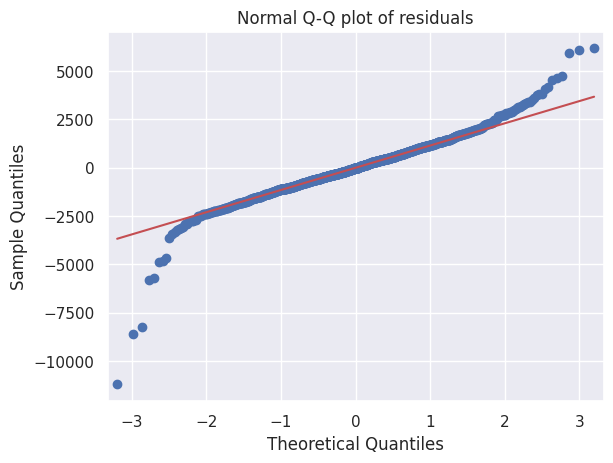

In [121]:
#Q-Q plot for the initial model that's been built
import statsmodels.api as sm
qqplot=sm.qqplot(basemodel_3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

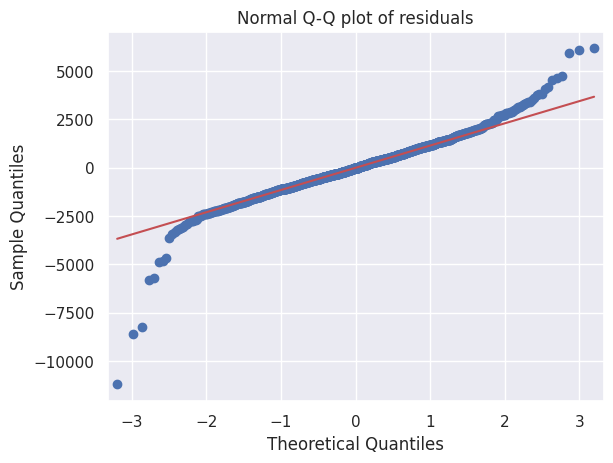

In [122]:
# FOR THE INTERMEDIATE MODEL
import statsmodels.api as sm
qqplot=sm.qqplot(intermodel.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

* most of the data points lie on the line and some points are off the line like say 5-10% of the points
* ofcourse the high curves of the points at the ends of the curves definitely say about the skewness of the data and we also observed that in the visualization using histograms

#NOW AS THE ASSUMPTIONS WERE CHECKED AND THE CHANGES HAVE BEEN MADE WE GO FOR TRAN AND TEST SPLIT OF THE DATA

In [198]:

finaltrain,finaltest = train_test_split(cars1,test_size = 0.2,random_state=0)



In [199]:
finaltrain.head()

,Age,KM,HP,Automatic,cc,Gears,Weight,CNG,Diesel,Petrol,Price
792,60,74720,110,0,1600,5,1085,0,0,1,11950
1158,80,97548,86,0,1300,5,1035,0,0,1,7950
1031,62,26000,107,1,1600,5,1085,0,0,1,12500
1125,71,107516,110,0,1600,5,1050,0,0,1,7750
422,52,89000,110,0,1600,5,1075,0,0,1,9750


In [200]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 792 to 684
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        1145 non-null   int64
 1   KM         1145 non-null   int64
 2   HP         1145 non-null   int64
 3   Automatic  1145 non-null   int64
 4   cc         1145 non-null   int64
 5   Gears      1145 non-null   int64
 6   Weight     1145 non-null   int64
 7   CNG        1145 non-null   int64
 8   Diesel     1145 non-null   int64
 9   Petrol     1145 non-null   int64
 10  Price      1145 non-null   int64
dtypes: int64(11)
memory usage: 107.3 KB


In [201]:
#building the model with the final train data
finalmodel1 = smf.ols('Price~Age+KM+HP+Gears+Weight+CNG+Diesel+Petrol',data=finaltrain).fit()
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1009.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:18:55   Log-Likelihood:                -9879.5
No. Observations:                1145   AIC:                         1.977e+04
Df Residuals:                    1137   BIC:                         1.982e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5537.4128   1269.271     -4.363      0.000   -8027.790   -3047.036
Age         -122.7450      2.959    -41.476      0.000    -128.552    -116.938
KM            -0.0199      0.002    -13.074      0.000      -0.023      -0.017
HP            21.6379      4.018      5.385      0.000      13.753      29.522
Gears        507.1850    223.068      2.274      0.023      69.514     944.856
Weight        19.8126      1.220     16.244      0.000      17.420      22.206
CNG        -2296.1442    493.386     -4.654      0.000   -3264.194   -1328.095
Diesel     -1800.2964    519.810     -3.463      0.001   -2820.190    -780.402
Petrol     -1440.9722    389.373     -3.701      0.000   -2204.942    -677.003
==============================================================================
Omnibus:                      230.735   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2497.235
Skew:                          -0.593   Prob(JB):                         0.00
Kurtosis:                      10.137   Cond. No.                     5.50e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [202]:
finalmodel1.resid

792     1363.720764
1158    1781.770576
1031    1256.876226
1125    -141.536583
422    -1336.609104
           ...     
763      199.796749
835     1381.793782
1216    -660.359512
559      188.144646
684     -311.619673
Length: 1145, dtype: float64

In [151]:
price_predict1=finalmodel1.predict(finaltest)
price_predict1

1149     7545.961499
233     13364.323671
1310     8557.646630
202     12571.478435
362     14118.030801
            ...     
666      8765.284074
991      9545.584328
896      8358.599939
511     10895.332453
1248     8847.712149
Length: 287, dtype: float64

##building the second model
* removing gears in this, as per domain knowledge number of gears doesn't matter

In [152]:
finalmodel2 = smf.ols('Price~Age+KM+HP+Weight+CNG+Diesel+Petrol',data=cars1).fit()
finalmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1491.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:01:19   Log-Likelihood:                -12341.
No. Observations:                1432   AIC:                         2.470e+04
Df Residuals:                    1425   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4761.1038    887.599     -5.364      0.000   -6502.244   -3019.964
Age         -123.3883      2.618    -47.126      0.000    -128.524    -118.252
KM            -0.0174      0.001    -13.105      0.000      -0.020      -0.015
HP            24.8698      3.394      7.327      0.000      18.211      31.529
Weight        20.6241      1.124     18.343      0.000      18.419      22.830
CNG        -2191.0528    375.574     -5.834      0.000   -2927.790   -1454.316
Diesel     -1597.2510    393.363     -4.061      0.000   -2368.883    -825.619
Petrol      -972.8000    260.534     -3.734      0.000   -1483.871    -461.729
==============================================================================
Omnibus:                      256.586   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2576.862
Skew:                          -0.516   Prob(JB):                         0.00
Kurtosis:                       9.490   Cond. No.                     6.03e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
finalmodel2.resid

0      -2751.586637
1      -2050.082593
2      -2269.974480
3       -913.779698
4      -1888.630915
           ...     
1427   -1173.368093
1428    2721.174856
1429     218.268226
1430   -1156.859952
1431   -3649.483181
Length: 1432, dtype: float64

In [154]:
price_predict2=finalmodel2.predict(finaltest)
price_predict2

1149     7659.773528
233     13425.595055
1310     8612.074539
202     12340.631766
362     14086.105230
            ...     
666      8902.355533
991      9522.886774
896      8274.212054
511     10848.004449
1248     8929.556825
Length: 287, dtype: float64

##Building the model 3
* removing weight of the car

In [155]:
finalmodel3 = smf.ols('Price~Age+KM+HP+CNG+Diesel+Petrol',data=cars1).fit()
finalmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1394.
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        11:01:38   Log-Likelihood:                -12493.
No. Observations:                1432   AIC:                         2.500e+04
Df Residuals:                    1426   BIC:                         2.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.079e+04    291.649     37.006      0.000    1.02e+04    1.14e+04
Age         -139.9550      2.731    -51.239      0.000    -145.313    -134.597
KM            -0.0194      0.001    -13.206      0.000      -0.022      -0.017
HP            57.3443      3.219     17.815      0.000      51.030      63.659
CNG         2496.3782    305.905      8.161      0.000    1896.306    3096.451
Diesel      5248.2842    138.212     37.973      0.000    4977.164    5519.404
Petrol      3047.9664    156.516     19.474      0.000    2740.940    3354.993
==============================================================================
Omnibus:                      219.199   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.819
Skew:                           0.576   Prob(JB):                    4.03e-272
Kurtosis:                       7.429   Cond. No.                     1.84e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.6e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [156]:
finalmodel3.resid

0      -3570.514354
1      -2816.573936
2      -3082.994120
3      -1680.958443
4      -2505.618026
           ...     
1427   -1216.362625
1428    2518.519686
1429      -4.962495
1430   -1396.859429
1431   -2561.862800
Length: 1432, dtype: float64

In [157]:
price_predict3=finalmodel3.predict(finaltest)
price_predict3

1149     7706.216733
233     13648.940257
1310     8191.395595
202     13323.264689
362     14386.160172
            ...     
666      9117.712664
991      9801.363681
896      8509.989847
511     11513.737376
1248     8554.696281
Length: 287, dtype: float64

In [158]:
basemodel_3.resid

0      -2735.783297
1      -2026.931300
2      -2255.868956
3       -898.301890
4      -1877.677655
           ...     
1431   -1205.323691
1432    2690.205016
1433     186.940836
1434   -1188.011441
1435   -3644.840627
Length: 1435, dtype: float64

In [159]:
intermodel.resid

0      -2737.662282
1      -2028.574955
2      -2257.794025
3       -900.166429
4      -1879.566206
           ...     
1427   -1206.785164
1428    2688.624521
1429     185.340600
1430   -1189.614334
1431   -3648.198882
Length: 1432, dtype: float64

* so after building the three models based on the inferences we got through out the whole process we can conclude that
      -final model 1 has predict less than the actaul values
      -final model 2 has predict more tha the actual values
      -final model 3 has predict more than finalmodel 2

* but out of all the final model 2 has comparitively high r squared and adj r squared values with respective to the f statistic score also final model 2 has more f statistic thatn the other two model, basemodel_3 and intermodel

# LASSO AND RIDGE REGULARIZATION

In [184]:
cars2=cars1.copy()
cars3=cars2.copy()

In [182]:
x=cars1.drop(columns=["Price"])

In [189]:
y=cars2.drop(columns=["Age","KM","HP","Automatic","cc","Gears","Weight","CNG","Petrol","Diesel"],axis=1)
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [211]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [212]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso.fit(x_train, y_train)



Lasso()

In [213]:
# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(x_train, y_train)


Ridge()

In [214]:
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso


array([ 7794.99632734, 11650.00045276,  7995.00447905, 10449.9943312 ,
       12900.00842507, 10499.98803965,  6949.98195716, 15750.0005662 ,
       11949.99840137, 11950.0062409 , 12950.0052549 , 10850.00518589,
        9499.9934297 , 10500.00621006, 10750.0020644 , 15499.99944348,
        7749.99759568,  5950.01152423,  9550.00752955, 12950.00560795,
        6949.98307555,  8950.00398684, 10500.00549869, 10450.00150885,
       11949.99641102,  7950.00344032,  7500.00757998,  8499.9768079 ,
        8949.97971188,  6950.02407238,  8250.00652699,  8250.01016755,
       13750.00293337, 12950.00217327, 13499.99952042, 12749.99798042,
        8950.00293374, 12899.99833244, 19600.00158939, 11750.00089622,
        8750.00754558, 13450.00733738,  6950.00590091, 15499.99729437,
        6499.96793352, 18245.00579573,  8900.0117027 ,  9499.9999905 ,
        6499.99057512,  9749.99788653, 12450.00300181,  7899.99624353,
       10950.00777477,  8950.00281448, 12900.00039915, 19949.99739566,
      

In [215]:
y_pred_ridge = ridge.predict(x_test)
y_pred_ridge

array([[ 7795.0000001 ],
       [11649.99999991],
       [ 7995.00000056],
       [10449.99999998],
       [12900.00000004],
       [10499.99999995],
       [ 6949.99999995],
       [15749.99999959],
       [11949.9999999 ],
       [11950.00000008],
       [12949.99999991],
       [10850.00000005],
       [ 9499.9999999 ],
       [10499.99999996],
       [10750.00000009],
       [15499.99999958],
       [ 7750.0000003 ],
       [ 5950.00000092],
       [ 9550.00000041],
       [12949.99999992],
       [ 6949.99999949],
       [ 8950.0000001 ],
       [10500.00000011],
       [10449.99999986],
       [11949.99999945],
       [ 7950.00000049],
       [ 7500.00000033],
       [ 8499.99999944],
       [ 8949.9999996 ],
       [ 6950.00000172],
       [ 8250.00000056],
       [ 8250.00000074],
       [13750.00000045],
       [12949.99999974],
       [13499.99999962],
       [12749.99999961],
       [ 8950.00000006],
       [12899.99999944],
       [19599.99999916],
       [11749.99999991],


# INTERVIEW QUESTIONS
1)
Normalization and Standardization are a feature scalling technique for data.

* To get different parameters and units into same scale.

STANDARDIZATION is process of scalling data into the scale of data mean and standard deviation.

Values we get after standardization is knowm as z-score.

z = (x-x.mean())/x.std()

if z = 0 .The data point is at mean.

if z = 2 .The data point is 2 standard deviation more than mean.

if z= -3. The data point is 3 stabdard deviation less than mean.

NORMALIZATION is the scaling data in range of (0 to 1). by using maximum value and minimum value of data.

N = (x-x.min())/(x.max()-x.min())

N ranges if 0 to 1.



2)
Multicollinearity in regression analysis occurs when two or more predictor variables are highly correlated to each other, such that they do not provide unique or independent information in the regression model.

variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

Formula and Calculation of VIF

The formula for VIF is Vma = 1/(1-r square)(r2 = coefficient of determination)

* VIF = 1: No multicollinearity.
* 1 < VIF < 5: Moderate multicollinearity.
* VIF >= 5: High multicollinearity, potentially problematic.
* VIF > 10: Very high multicollinearity, typically considered problematic and often used as a rule of thumb threshold.